In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast
import os
from datasets import load_dataset
from utils import find_num_parts

# Fetch from huf

In [21]:
hf_dataset = load_dataset("Howard881010/climate-1day-finetuned")

num_key_name = 'temp'
window_size = 1
df_valid = pd.DataFrame(hf_dataset['valid'])
df_valid['input_times'] = df_valid['input_num'].apply(lambda x: x[0][0])
df_test = pd.DataFrame(hf_dataset['test'])
df_test['input_times'] = df_test['input_num'].apply(lambda x: x[0][0])
df_test['output_times'] = df_test['output_num'].apply(lambda x: x[0][0])
df_test['pred_times'] = df_test['pred_output_case4'].apply(lambda x: find_num_parts(x, num_key_name, window_size)[0][0])


In [22]:
df = pd.read_csv("/home/ubuntu/multimodal/Predictions_and_attempts/results_climate_bge/1_1.csv")
df_nlinear = pd.read_csv("/home/ubuntu/multimodal/Predictions_and_attempts/climate/1_day/mixed/nlinear_output_test.csv")
df_nlinear_text = pd.read_csv("/home/ubuntu/multimodal/Predictions_and_attempts/climate/1_day/mixed/nlinear_text_output_test.csv")
df_nlinear['nlinear_times'] = df_nlinear['pred_num'].apply(ast.literal_eval).apply(lambda x: x[0][0])
df_nlinear_text['nlinear_text_times'] = df_nlinear_text['pred_num'].apply(ast.literal_eval).apply(lambda x: x[0][0])


df['pred_times'] = df['pred_times'].apply(
    lambda x: np.fromstring(x.strip('[]'), sep=' ').tolist()).apply(lambda x: x[0])

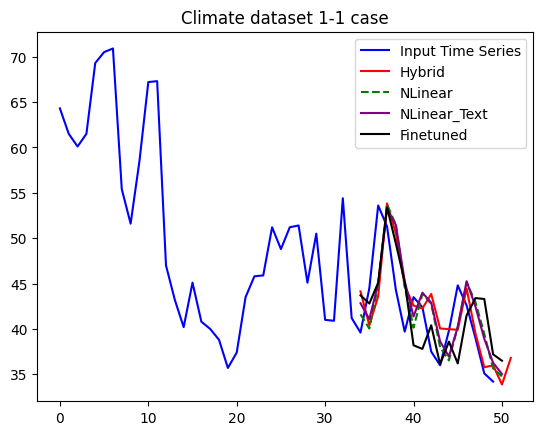

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_train, df_valid, and df_test are already defined

# Concatenate input_times columns from all three datasets
df_combined = pd.concat([df_valid[['input_times']], df_test[['input_times']]])

# Verifying length of df_valid

# Adjusting df, df_nlinear, and df_nlinear_text to match the output window (400 - length of df_valid)
df = df.iloc[:380 - len(df_valid)]  # Slice up to 400 minus the length of df_valid
df_nlinear = df_nlinear.iloc[1:(380 - len(df_valid))]
df_nlinear_text = df_nlinear_text.iloc[1:(380 - len(df_valid))]
df_test = df_test.iloc[1:(380 - len(df_valid))]

# Now filter df_combined to only include values between index 300 and 400
df_combined = df_combined.iloc[330:380]  # Only select the rows between index 300 and 400


# Plot the combined input_times as the blue line
plt.plot(df_combined['input_times'].reset_index(drop=True), color='blue', label='Input Time Series')

# Plot the output_times from df_test in its correct place on the x-axis
output_start_index = len(df_valid) - 330 + 2
plt.plot(range(output_start_index, output_start_index + len(df)), df['pred_times'], color='red', label='Hybrid')
plt.plot(range(output_start_index, output_start_index + len(df_nlinear)), df_nlinear['nlinear_times'], color='green', label='NLinear', linestyle='dashed')
plt.plot(range(output_start_index, output_start_index + len(df_nlinear_text)), df_nlinear_text['nlinear_text_times'], color='purple', label='NLinear_Text')
plt.plot(range(output_start_index, output_start_index + len(df_test)), df_test['pred_times'], color='black', label='Finetuned')
# Add a legend
plt.legend()

# Add a title
plt.title("Climate dataset 1-1 case")
plt.savefig('plot.pdf')

# Show the plot
plt.show()


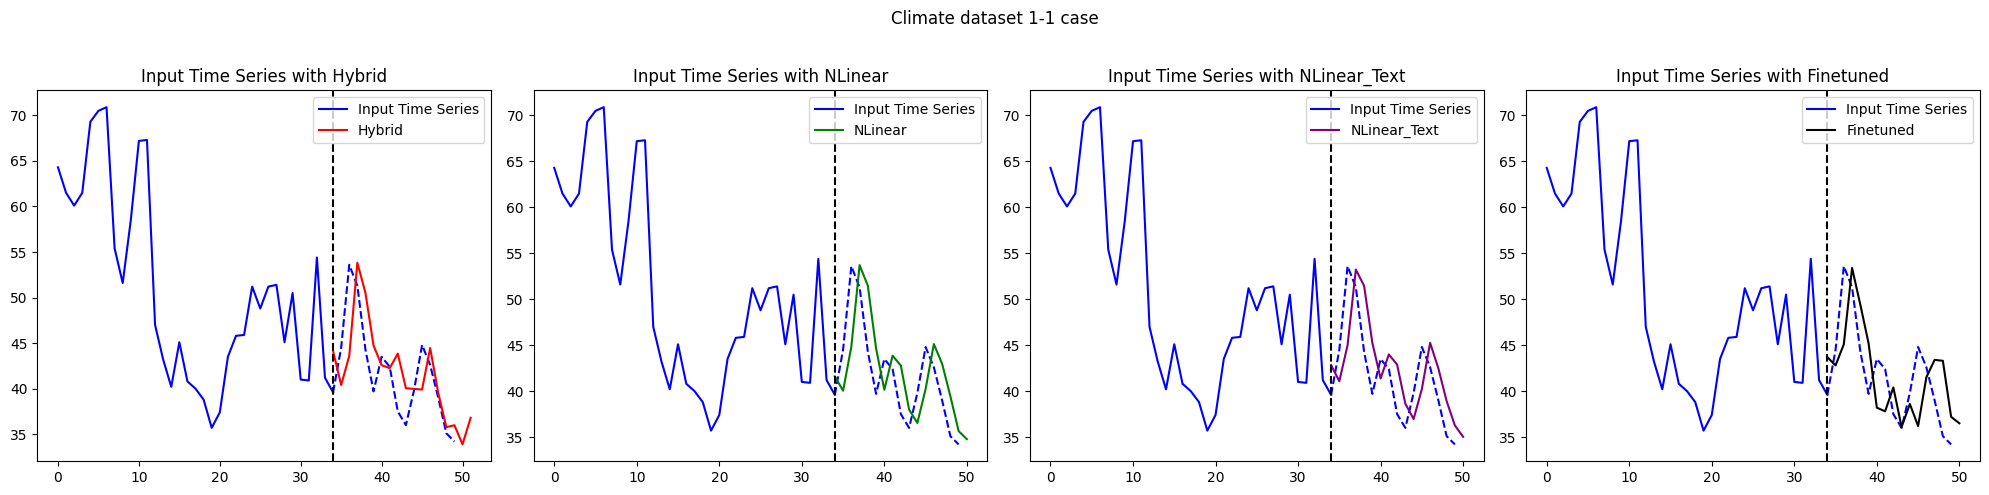

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df_train, df_valid, df_test, df, df_nlinear, df_nlinear_text are already defined

# Concatenate input_times columns from all three datasets
df_combined = pd.concat([df_valid[['input_times']], df_test[['input_times']]])

# Verifying length of df_valid
# Adjusting df, df_nlinear, and df_nlinear_text to match the output window (380 - length of df_valid)
df = df.iloc[:380 - len(df_valid)]  # Slice up to 380 minus the length of df_valid
df_nlinear = df_nlinear.iloc[1:(380 - len(df_valid))]
df_nlinear_text = df_nlinear_text.iloc[1:(380 - len(df_valid))]
df_test = df_test.iloc[1:(380 - len(df_valid))]

# Now filter df_combined to only include values between index 300 and 380
df_combined = df_combined.iloc[330:380]  # Only select the rows between index 330 and 380

# Set up the figure with four subplots in a single row
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Calculate the start index for model predictions
output_start_index = len(df_valid) - 330 + 2

# Function to plot with dashed ground truth after prediction start
def plot_with_dashed_ground_truth(ax, input_data, model_data, model_name, color):
    x = np.arange(len(input_data))
    ax.plot(x[:output_start_index+1], input_data[:output_start_index+1], color='blue', label='Input Time Series')
    ax.plot(x[output_start_index:], input_data[output_start_index:], color='blue', linestyle='--')
    ax.plot(range(output_start_index, output_start_index + len(model_data)), model_data, color=color, label=model_name)
    ax.axvline(x=output_start_index, color='black', linestyle='--')
    ax.set_title(f'Input Time Series with {model_name}')
    ax.legend()

# Plot Input Time Series with Hybrid
plot_with_dashed_ground_truth(axs[0], df_combined['input_times'].reset_index(drop=True), df['pred_times'], 'Hybrid', 'red')

# Plot Input Time Series with NLinear
plot_with_dashed_ground_truth(axs[1], df_combined['input_times'].reset_index(drop=True), df_nlinear['nlinear_times'], 'NLinear', 'green')

# Plot Input Time Series with NLinear_Text
plot_with_dashed_ground_truth(axs[2], df_combined['input_times'].reset_index(drop=True), df_nlinear_text['nlinear_text_times'], 'NLinear_Text', 'purple')

# Plot Input Time Series with Finetuned
plot_with_dashed_ground_truth(axs[3], df_combined['input_times'].reset_index(drop=True), df_test['pred_times'], 'Finetuned', 'black')

# Add an overall title and adjust layout
plt.suptitle("Climate dataset 1-1 case")
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save and show the plot
plt.savefig('climate_subplots.pdf')
plt.show()